In [1]:
import pandas as pd
import numpy as np
import glob
import os

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 경로 설정
folder_path = "../data/train/1.회원정보/"
file_list = glob.glob(os.path.join(folder_path, "*.parquet"))

# 파일별 데이터프레임 읽어서 리스트에 저장
df_list = [pd.read_parquet(file) for file in sorted(file_list)]

# 하나의 데이터프레임으로 병합
df_total = pd.concat(df_list, ignore_index=True)


In [3]:
display(df_total)

,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201807,TRAIN_000000,2,40대,D,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),22
1,201807,TRAIN_000001,1,30대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),18
2,201807,TRAIN_000002,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,20
3,201807,TRAIN_000003,2,40대,D,1,1,0,1,2,...,0,0,0,0개,0개,0개,0개,1,자녀성장(2),17
4,201807,TRAIN_000004,2,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,1,자녀성장(1),15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,2,70대이상,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,노년생활,39
2399996,201812,TRAIN_399996,2,50대,D,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),24
2399997,201812,TRAIN_399997,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,18
2399998,201812,TRAIN_399998,1,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),27


In [4]:
# object 타입은 범주형 변수로 간주
categorical_cols = df_total.select_dtypes(include=['object']).columns.tolist()

# 숫자형 변수는 연속형으로 간주
numerical_cols = df_total.select_dtypes(include=['int64', 'float64']).columns.tolist()


### 범주형 변수 처리

In [5]:
for col in categorical_cols:
    print(f"\n[{col}] value_counts:")
    display(df_total[col].value_counts(dropna= False))



[ID] value_counts:


ID
TRAIN_399983    6
TRAIN_399982    6
TRAIN_399981    6
TRAIN_399980    6
TRAIN_399979    6
               ..
TRAIN_000004    6
TRAIN_000003    6
TRAIN_000002    6
TRAIN_000001    6
TRAIN_000000    6
Name: count, Length: 400000, dtype: int64


[연령] value_counts:


연령
40대      733146
30대      592146
50대      546342
60대      246990
20대      191880
70대이상     89496
Name: count, dtype: int64


[Segment] value_counts:


Segment
E    1922052
D     349242
C     127590
A        972
B        144
Name: count, dtype: int64


[가입통신회사코드] value_counts:


가입통신회사코드
S사      995637
K사      565208
L사      451585
None    387570
Name: count, dtype: int64


[거주시도명] value_counts:


거주시도명
서울    692656
경기    652987
인천    162815
부산    149007
대전    142800
충북    110601
경남     96244
경북     91237
대구     80687
울산     70491
전남     55304
광주     36659
충남     30091
전북     13572
강원     12156
제주      2544
세종       149
Name: count, dtype: int64


[직장시도명] value_counts:


직장시도명
경기      598244
서울      576618
None    244969
인천      146944
부산      131285
대전      120697
충북      103951
경남       94527
경북       82975
대구       76605
울산       66275
전남       52849
광주       34100
충남       28361
전북       20442
강원       15485
세종        3117
제주        2556
Name: count, dtype: int64


[_1순위신용체크구분] value_counts:


_1순위신용체크구분
신용      2295461
체크        76589
None      27950
Name: count, dtype: int64


[_2순위신용체크구분] value_counts:


_2순위신용체크구분
None    958115
신용      873447
체크      568438
Name: count, dtype: int64


[연회비발생카드수_B0M] value_counts:


연회비발생카드수_B0M
0개      2394826
1개이상       5174
Name: count, dtype: int64


[상품관련면제카드수_B0M] value_counts:


상품관련면제카드수_B0M
0개    2400000
Name: count, dtype: int64


[임직원면제카드수_B0M] value_counts:


임직원면제카드수_B0M
0개    2400000
Name: count, dtype: int64


[우수회원면제카드수_B0M] value_counts:


우수회원면제카드수_B0M
0개    2400000
Name: count, dtype: int64


[기타면제카드수_B0M] value_counts:


기타면제카드수_B0M
0개    2400000
Name: count, dtype: int64


[Life_Stage] value_counts:


Life_Stage
자녀성장(1)    795610
자녀성장(2)    591048
자녀출산기      245797
가족구축기      242373
노년생활       233300
자녀독립기      198237
독신          93635
Name: count, dtype: int64

In [6]:
# 연령
# 40대      733146
# 30대      592146
# 50대      546342
# 60대      246990
# 20대      191880
# 70대이상     89496
# Name: count, dtype: int64

# 연령에서 숫자만 뽑아서 만들기
df_total['연령'] = df_total['연령'].str.extract(r'(\d+)').astype(float)
print(df_total['연령'].describe())

count    2.400000e+06
mean     4.138710e+01
std      1.233771e+01
min      2.000000e+01
25%      3.000000e+01
50%      4.000000e+01
75%      5.000000e+01
max      7.000000e+01
Name: 연령, dtype: float64


In [7]:
# 가입통신회사코드
# S사      995637
# K사      565208
# L사      451585
# None    387570
# Name: count, dtype: int64

# 결측값 '미확인'으로 채우기
df_total['가입통신회사코드'] = df_total['가입통신회사코드'].fillna('미확인')

# 수동 매핑
telecom_map = {
    '미확인': 0,
    'K사': 1,
    'L사': 2,
    'S사': 3
}

df_total['가입통신회사코드'] = df_total['가입통신회사코드'].map(telecom_map)
print(df_total["가입통신회사코드"].describe())


count    2.400000e+06
mean     1.856370e+00
std      1.129457e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: 가입통신회사코드, dtype: float64


In [8]:
# 거주시도명
# 서울    692656
# 경기    652987
# 인천    162815
# 부산    149007
# 대전    142800
# 충북    110601
# 경남     96244
# 경북     91237
# 대구     80687
# 울산     70491
# 전남     55304
# 광주     36659
# 충남     30091
# 전북     13572
# 강원     12156
# 제주      2544
# 세종       149

def 시도_그룹화(시도):
    if 시도 in ['서울', '경기', '인천']:
        return 1  # 수도권
    elif 시도 in ['부산', '대구', '대전', '광주', '울산', '세종']:
        return 2  # 광역시
    else:
        return 3  # 그 외 도 단위

df_total['거주시도명'] = df_total['거주시도명'].apply(시도_그룹화)
df_total["거주시도명"].describe()


count    2.400000e+06
mean     1.543038e+00
std      7.689422e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.000000e+00
Name: 거주시도명, dtype: float64

In [9]:
# 직장시도명
# 경기      598244
# 서울      576618
# None    244969
# 인천      146944
# 부산      131285
# 대전      120697
# 충북      103951
# 경남       94527
# 경북       82975
# 대구       76605
# 울산       66275
# 전남       52849
# 광주       34100
# 충남       28361
# 전북       20442
# 강원       15485
# 세종        3117
# 제주        2556

def 시도_그룹화(시도):
    if pd.isna(시도):
        return -1  # 결측값 처리
    elif 시도 in ['서울', '경기', '인천']:
        return 1  # 수도권
    elif 시도 in ['부산', '대구', '대전', '광주', '울산', '세종']:
        return 2  # 광역시
    else:
        return 3  # 그 외 도 단위

df_total['직장시도명'] = df_total['직장시도명'].apply(시도_그룹화)
df_total["직장시도명"].describe()

count    2.400000e+06
mean     1.310180e+00
std      1.077349e+00
min     -1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.000000e+00
Name: 직장시도명, dtype: float64

In [10]:
# _1순위신용체크구분
# 신용      2295461
# 체크        76589
# None      27950

# _2순위신용체크구분
# None    958115
# 신용      873447
# 체크      568438

# 우선 결측값을 문자열 'None'으로 통일하지 않고, 바로 NaN 처리 기반으로 인코딩

def encode_신용체크(value):
    if pd.isna(value):
        return -1
    elif value == '체크':
        return 0
    elif value == '신용':
        return 1
    else:
        return -1  # 혹시 모를 이상값 대비


# 컬럼에 적용
df_total['_1순위신용체크구분'] = df_total['_1순위신용체크구분'].apply(encode_신용체크)
df_total['_2순위신용체크구분'] = df_total['_2순위신용체크구분'].apply(encode_신용체크)
print(df_total['_1순위신용체크구분'].describe())
print(df_total['_2순위신용체크구분'].describe())

count    2.400000e+06
mean     9.447963e-01
std      2.746780e-01
min     -1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: _1순위신용체크구분, dtype: float64
count    2.400000e+06
mean    -3.527833e-02
std      8.728726e-01
min     -1.000000e+00
25%     -1.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: _2순위신용체크구분, dtype: float64


In [11]:
# 연회비발생카드수_B0M
# 0개      2394826
# 1개이상       5174

# 숫자만 저장
df_total['연회비발생카드수_B0M'] = df_total['연회비발생카드수_B0M'].str.extract(r'(\d+)').astype(int)
print(df_total['연회비발생카드수_B0M'].describe())

count    2.400000e+06
mean     2.155833e-03
std      4.638089e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: 연회비발생카드수_B0M, dtype: float64


In [12]:
# 해당 열은 삭제제


# 상품관련면제카드수_B0M
# 0개    2400000

# 임직원면제카드수_B0M
# 0개    2400000

# 우수회원면제카드수_B0M
# 0개    2400000

# 기타면제카드수_B0M
# 0개    2400000

cols_to_drop = [
    '상품관련면제카드수_B0M',
    '임직원면제카드수_B0M',
    '우수회원면제카드수_B0M',
    '기타면제카드수_B0M'
]

df_total.drop(columns=cols_to_drop, inplace=True)

In [13]:
# Life_Stage
# 자녀성장(1)    795610
# 자녀성장(2)    591048
# 자녀출산기      245797
# 가족구축기      242373
# 노년생활       233300
# 자녀독립기      198237
# 독신          93635

life_stage_map = {
    '독신': 0,
    '자녀출산기': 1,
    '자녀성장(1)': 2,
    '자녀성장(2)': 3,
    '자녀독립기': 4,
    '가족구축기': 5,
    '노년생활': 6
}

df_total['Life_Stage'] = df_total['Life_Stage'].map(life_stage_map).fillna(-1).astype(int)

### 연속형 변수 처리

In [14]:
# 결측 값 확인

missing_counts = df_total[numerical_cols].isna().sum()
missing_counts = missing_counts[missing_counts > 0]  # 결측치 있는 변수만 필터링

print(missing_counts)


최종유효년월_신용_이용가능    210447
최종유효년월_신용_이용      534231
최종카드발급일자           41965
dtype: int64


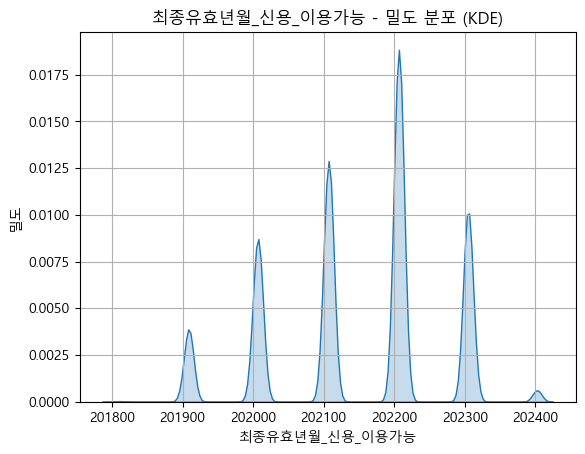

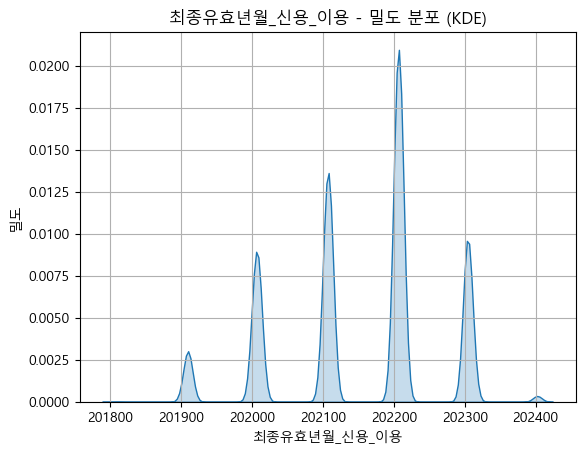

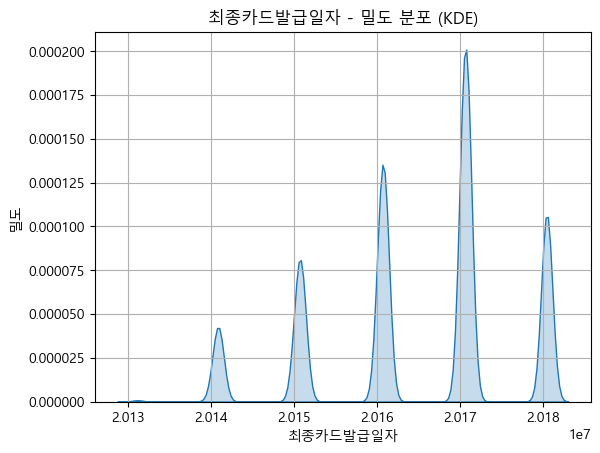

In [15]:

missing_cols = df_total[numerical_cols].columns[df_total[numerical_cols].isna().any()].tolist()

plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우일 경우

for col in missing_cols:
    plt.figure()
    sns.kdeplot(df_total[col].dropna(), fill=True)
    plt.title(f"{col} - 밀도 분포 (KDE)")
    plt.xlabel(col)
    plt.ylabel("밀도")
    plt.grid(True)
    plt.show()

In [16]:
# 최종유효년월_신용_이용가능    210447
# 최종유효년월_신용_이용      534231

# 이 두 개의 변수는 버립시다..
df_total.drop(columns=['최종유효년월_신용_이용', '최종유효년월_신용_이용가능'], inplace=True)


In [17]:
# 1. 기준년월 → datetime(YYYYMM)
df_total['기준년월'] = pd.to_datetime(
    df_total['기준년월'].astype(str).str.extract(r'(\d{6})')[0],
    format='%Y%m',
    errors='coerce'
)

# 2. 최종카드발급일자 처리
#    - 결측값은 2099년 1월 1일로 대체
#    - float → int → str → datetime
df_total['최종카드발급일자_정제'] = df_total['최종카드발급일자'].fillna(20990101.0).astype(int).astype(str)

df_total['최종카드발급일자'] = pd.to_datetime(
    df_total['최종카드발급일자_정제'],
    format='%Y%m%d',
    errors='coerce'
)

# 3. 개월 수 차이 계산 함수
def calc_elapsed_months(later, earlier):
    if pd.isna(later) or pd.isna(earlier):
        return -1
    diff = (later.to_period('M') - earlier.to_period('M')).n
    return diff if diff >= 0 else -1

# 4. 카드보유_개월수 계산
df_total['카드보유_개월수'] = df_total.apply(
    lambda row: calc_elapsed_months(row['기준년월'], row['최종카드발급일자']),
    axis=1
)


In [18]:
print(df_total['기준년월'].head())
print(df_total["최종카드발급일자"].head())
print(df_total['카드보유_개월수'].head())

0   2018-07-01
1   2018-07-01
2   2018-07-01
3   2018-07-01
4   2018-07-01
Name: 기준년월, dtype: datetime64[ns]
0   2016-09-12
1   2017-01-22
2   2016-11-13
3   2017-02-05
4   2017-04-09
Name: 최종카드발급일자, dtype: datetime64[ns]
0    22
1    18
2    20
3    17
4    15
Name: 카드보유_개월수, dtype: int64


In [19]:
# 5. 중간 정제 변수 제거
df_total.drop(columns=['최종카드발급일자_정제', "최종카드발급일자"], inplace=True)

In [20]:
pd.set_option('display.max_columns', None)  # 모든 컬럼 표시
pd.set_option('display.max_rows', None)     # 모든 행도 표시 가능 (원하면)
display(df_total.head())

,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,소지카드수_이용가능_신용,입회일자_신용,입회경과개월수_신용,회원여부_연체,이용거절여부_카드론,동의여부_한도증액안내,수신거부여부_TM,수신거부여부_DM,수신거부여부_메일,수신거부여부_SMS,가입통신회사코드,탈회횟수_누적,최종탈회후경과월,탈회횟수_발급6개월이내,탈회횟수_발급1년이내,거주시도명,직장시도명,마케팅동의여부,유효카드수_신용체크,유효카드수_신용,유효카드수_신용_가족,유효카드수_체크,유효카드수_체크_가족,이용가능카드수_신용체크,이용가능카드수_신용,이용가능카드수_신용_가족,이용가능카드수_체크,이용가능카드수_체크_가족,이용카드수_신용체크,이용카드수_신용,이용카드수_신용_가족,이용카드수_체크,이용카드수_체크_가족,이용금액_R3M_신용체크,이용금액_R3M_신용,이용금액_R3M_신용_가족,이용금액_R3M_체크,이용금액_R3M_체크_가족,_1순위카드이용금액,_1순위카드이용건수,_1순위신용체크구분,_2순위카드이용금액,_2순위카드이용건수,_2순위신용체크구분,보유여부_해외겸용_본인,이용가능여부_해외겸용_본인,이용여부_3M_해외겸용_본인,보유여부_해외겸용_신용_본인,이용가능여부_해외겸용_신용_본인,이용여부_3M_해외겸용_신용_본인,연회비발생카드수_B0M,연회비할인카드수_B0M,기본연회비_B0M,제휴연회비_B0M,할인금액_기본연회비_B0M,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,카드신청건수,Life_Stage,최종카드발급경과월,카드보유_개월수
0,2018-07-01,TRAIN_000000,2,40.0,D,1,1,0,1,1,1,20130101,67,0,0,1,0,0,0,0,2,1,61,0,0,1,1,1,2,1,0,1,0,2,1,0,1,0,1,1,0,0,0,196,196,0,0,0,3681,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,22,22
1,2018-07-01,TRAIN_000001,1,30.0,E,1,1,1,1,1,1,20170801,12,0,0,0,0,0,0,0,1,1,98,0,0,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,13475,13475,0,0,0,13323,46,1,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,18,18
2,2018-07-01,TRAIN_000002,1,30.0,C,1,1,0,1,1,1,20080401,124,0,0,1,0,0,0,0,3,1,60,0,0,1,1,1,2,1,0,1,0,2,1,0,1,0,1,1,0,0,0,23988,23988,0,0,0,24493,28,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20,20
3,2018-07-01,TRAIN_000003,2,40.0,D,1,1,0,1,2,2,20160501,27,0,0,1,0,0,0,0,2,1,100,0,0,2,2,1,3,2,0,1,0,3,2,0,1,0,1,1,0,0,0,3904,3904,0,0,0,5933,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,3,17,17
4,2018-07-01,TRAIN_000004,2,40.0,E,1,1,1,1,1,1,20180601,2,0,0,0,0,0,0,0,1,1,101,0,0,2,2,1,2,1,0,1,0,2,1,0,1,0,1,0,0,1,0,1190,0,0,1190,0,0,-2,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,2,15,15


In [21]:
# describe 출력
numerical_cols = [col for col in numerical_cols if col not in ['최종유효년월_신용_이용가능', '최종유효년월_신용_이용', '최종카드발급일자']]
df_total[numerical_cols].describe().transpose()

,count,mean,min,25%,50%,75%,max,std
기준년월,2400000,2018-09-15 20:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-16 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,NaN
남녀구분코드,2400000.0,1.476955,1.0,1.0,1.0,2.0,2.0,0.499469
회원여부_이용가능,2400000.0,0.952575,0.0,1.0,1.0,1.0,1.0,0.212546
회원여부_이용가능_CA,2400000.0,0.880101,0.0,1.0,1.0,1.0,1.0,0.324843
회원여부_이용가능_카드론,2400000.0,0.621312,0.0,0.0,1.0,1.0,1.0,0.48506
소지여부_신용,2400000.0,0.982547,0.0,1.0,1.0,1.0,1.0,0.130952
소지카드수_유효_신용,2400000.0,1.246258,0.0,1.0,1.0,1.0,4.0,0.566744
소지카드수_이용가능_신용,2400000.0,1.153016,0.0,1.0,1.0,1.0,3.0,0.620281
입회일자_신용,2400000.0,20122577.80625,19901101.0,20100301.0,20140701.0,20170601.0,20180601.0,60464.04851
입회경과개월수_신용,2400000.0,73.602731,2.0,17.0,51.0,104.0,337.0,72.410422


In [22]:
df_total.head()

,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,소지카드수_이용가능_신용,입회일자_신용,입회경과개월수_신용,회원여부_연체,이용거절여부_카드론,동의여부_한도증액안내,수신거부여부_TM,수신거부여부_DM,수신거부여부_메일,수신거부여부_SMS,가입통신회사코드,탈회횟수_누적,최종탈회후경과월,탈회횟수_발급6개월이내,탈회횟수_발급1년이내,거주시도명,직장시도명,마케팅동의여부,유효카드수_신용체크,유효카드수_신용,유효카드수_신용_가족,유효카드수_체크,유효카드수_체크_가족,이용가능카드수_신용체크,이용가능카드수_신용,이용가능카드수_신용_가족,이용가능카드수_체크,이용가능카드수_체크_가족,이용카드수_신용체크,이용카드수_신용,이용카드수_신용_가족,이용카드수_체크,이용카드수_체크_가족,이용금액_R3M_신용체크,이용금액_R3M_신용,이용금액_R3M_신용_가족,이용금액_R3M_체크,이용금액_R3M_체크_가족,_1순위카드이용금액,_1순위카드이용건수,_1순위신용체크구분,_2순위카드이용금액,_2순위카드이용건수,_2순위신용체크구분,보유여부_해외겸용_본인,이용가능여부_해외겸용_본인,이용여부_3M_해외겸용_본인,보유여부_해외겸용_신용_본인,이용가능여부_해외겸용_신용_본인,이용여부_3M_해외겸용_신용_본인,연회비발생카드수_B0M,연회비할인카드수_B0M,기본연회비_B0M,제휴연회비_B0M,할인금액_기본연회비_B0M,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,카드신청건수,Life_Stage,최종카드발급경과월,카드보유_개월수
0,2018-07-01,TRAIN_000000,2,40.0,D,1,1,0,1,1,1,20130101,67,0,0,1,0,0,0,0,2,1,61,0,0,1,1,1,2,1,0,1,0,2,1,0,1,0,1,1,0,0,0,196,196,0,0,0,3681,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,22,22
1,2018-07-01,TRAIN_000001,1,30.0,E,1,1,1,1,1,1,20170801,12,0,0,0,0,0,0,0,1,1,98,0,0,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,13475,13475,0,0,0,13323,46,1,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,18,18
2,2018-07-01,TRAIN_000002,1,30.0,C,1,1,0,1,1,1,20080401,124,0,0,1,0,0,0,0,3,1,60,0,0,1,1,1,2,1,0,1,0,2,1,0,1,0,1,1,0,0,0,23988,23988,0,0,0,24493,28,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20,20
3,2018-07-01,TRAIN_000003,2,40.0,D,1,1,0,1,2,2,20160501,27,0,0,1,0,0,0,0,2,1,100,0,0,2,2,1,3,2,0,1,0,3,2,0,1,0,1,1,0,0,0,3904,3904,0,0,0,5933,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,3,17,17
4,2018-07-01,TRAIN_000004,2,40.0,E,1,1,1,1,1,1,20180601,2,0,0,0,0,0,0,0,1,1,101,0,0,2,2,1,2,1,0,1,0,2,1,0,1,0,1,0,0,1,0,1190,0,0,1190,0,0,-2,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,2,15,15


### 변수 유의성 확인 

In [23]:
from scipy.stats import f_oneway, chi2_contingency

result_list = []

for col in df_total.columns:
    if col == 'Segment':
        continue
    
    # 숫자형 변수: ANOVA
    if df_total[col].dtype in ['int64', 'float64']:
        groups = [df_total[df_total['Segment'] == seg][col].dropna() for seg in df_total['Segment'].unique()]
        try:
            stat, p = f_oneway(*groups)
            result_list.append((col, 'numeric', p))
        except:
            result_list.append((col, 'numeric', None))

    # 범주형 변수: 카이제곱
    elif df_total[col].dtype == 'object' or df_total[col].dtype.name == 'category':
        try:
            contingency = pd.crosstab(df_total[col], df_total['Segment'])
            chi2, p, dof, expected = chi2_contingency(contingency)
            result_list.append((col, 'categorical', p))
        except:
            result_list.append((col, 'categorical', None))

# 결과 정리
result_df = pd.DataFrame(result_list, columns=['변수명', '변수유형', 'p-value']).sort_values(by='p-value')
display(result_df)


c:\Users\SSAFY\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


,변수명,변수유형,p-value
0,ID,categorical,0.000000e+00
1,남녀구분코드,numeric,0.000000e+00
2,연령,numeric,0.000000e+00
3,회원여부_이용가능,numeric,0.000000e+00
4,회원여부_이용가능_CA,numeric,0.000000e+00
6,소지여부_신용,numeric,0.000000e+00
7,소지카드수_유효_신용,numeric,0.000000e+00
8,소지카드수_이용가능_신용,numeric,0.000000e+00
12,이용거절여부_카드론,numeric,0.000000e+00
9,입회일자_신용,numeric,0.000000e+00


In [24]:
print(df_total["할인금액_제휴연회비_B0M"].describe())

count    2400000.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: 할인금액_제휴연회비_B0M, dtype: float64


In [25]:
## NAN 값 버리기
nan_vars = result_df[result_df['p-value'].isna()]['변수명'].tolist()
train_df = df_total.drop(columns=[col for col in nan_vars if col in df_total.columns])
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 67 columns):
 #   Column              Dtype         
---  ------              -----         
 0   기준년월                datetime64[ns]
 1   ID                  object        
 2   남녀구분코드              int64         
 3   연령                  float64       
 4   Segment             object        
 5   회원여부_이용가능           int64         
 6   회원여부_이용가능_CA        int64         
 7   회원여부_이용가능_카드론       int64         
 8   소지여부_신용             int64         
 9   소지카드수_유효_신용         int64         
 10  소지카드수_이용가능_신용       int64         
 11  입회일자_신용             int64         
 12  입회경과개월수_신용          int64         
 13  회원여부_연체             int64         
 14  이용거절여부_카드론          int64         
 15  동의여부_한도증액안내         int64         
 16  수신거부여부_TM           int64         
 17  수신거부여부_DM           int64         
 18  수신거부여부_메일           int64         
 19  수신거부여부_SMS          int64         
 20  가입

### 모델링 ㄱ

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# 피처/타깃 정의 (너가 제공한 코드 기반)
feature_cols = [col for col in train_df.columns if col not in ["ID", "Segment", "기준년월"]]
X = train_df[feature_cols].copy()
y = train_df["Segment"].copy()

# 타깃 인코딩
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# 범주형 변수 인코딩
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

    # # 테스트 데이터도 동일하게 처리
    # if col in test_df.columns:
    #     unseen_labels = set(test_df[col]) - set(le.classes_)
    #     if unseen_labels:
    #         le.classes_ = np.append(le.classes_, list(unseen_labels))
    #     test_df[col] = le.transform(test_df[col])

# train/val 분할
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42) #stratify=y_encoded


In [27]:
print(X_train.head())
print(y_train)

         남녀구분코드    연령  회원여부_이용가능  회원여부_이용가능_CA  회원여부_이용가능_카드론  소지여부_신용  \
1848553       1  20.0          1             1              0        1   
1787588       1  60.0          1             0              0        1   
292630        1  50.0          1             1              1        1   
1237198       2  60.0          0             0              0        0   
1278871       2  40.0          1             1              0        1   

         소지카드수_유효_신용  소지카드수_이용가능_신용   입회일자_신용  입회경과개월수_신용  회원여부_연체  \
1848553            1              1  20160601          30        0   
1787588            1              0  20050201         166        0   
292630             2              2  19920801         312        0   
1237198            0              0  20030801         183        0   
1278871            1              1  20170201          21        0   

         이용거절여부_카드론  동의여부_한도증액안내  수신거부여부_TM  수신거부여부_DM  수신거부여부_메일  수신거부여부_SMS  \
1848553           1            0          1          

In [ ]:
# XGBoost 모델 학습
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred, target_names=le_target.classes_))


c:\Users\SSAFY\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [10:54:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.8584854166666667
              precision    recall  f1-score   support

           A       1.00      0.01      0.03       201
           B       0.00      0.00      0.00        45
           C       0.67      0.39      0.50     25532
           D       0.59      0.45      0.51     69969
           E       0.90      0.96      0.93    384253

    accuracy                           0.86    480000
   macro avg       0.63      0.36      0.39    480000
weighted avg       0.84      0.86      0.85    480000



c:\Users\SSAFY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SSAFY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SSAFY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [29]:
from sklearn.metrics import f1_score

# 예측
y_pred = model.predict(X_val)

# 평가: micro F1-score
micro_f1 = f1_score(y_val, y_pred, average='micro')
print("✅ Micro F1-score:", micro_f1)


✅ Micro F1-score: 0.8584854166666667


In [30]:
train_df.to_csv('../clean_data/userinfo_train_preprocessed.csv', index=False)